# MTH9879 Homework 4

Assigned: February 21, 2017.
Due: March 7, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\underbar}{\underline}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\EE}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.


* **Author: Hongchao Pan**
* Kernel Version: R 3.3.2
* Packages/Libraries: zoo, xts, quantmod, highfrequency, repr
* Notes:
    * The running time of the notebook is aournd 7s
    * Q3: Cannot reproduce Figure 6 of lecture notes 4. I am wondering whether the given data here is not consistent with the data used in lecture notes 4.
    * Q5
        * $\epsilon_t$ is time series from 2 to end of tradeSigns
        * $\epsilon_{t-1}$ is time series from 1 to end-1 of tradeSigns
        * $\Delta p_t$ is time series from 2 to end minus 1 to end-1 of price 

In [1]:
# install packages if not have

#install.packages("highfrequency")
# Cannot install 'highfrequency' from CRAN
# download the r-release binaries and copy to the R library folder

#install.packages("quantmod")
#install.packages("zoo")

# Loading libraries
library(zoo)
library(xts)
library(quantmod)  # Attached to highfrequency
library(highfrequency)
library(repr) # For changing plot features


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘highfrequency’

The following objects are masked from ‘package:quantmod’:

    getPrice, has.Qty



In [2]:
# Record the total running time of this notebook
# Starting record the time
ptm<-proc.time()

### 0. (0 points) 
Read Chapter 5 and 6 of Hasbrouck and Chapters 2 and 3 of Foucault, Pagano and R&ouml;ell. 


## Glosten and Milgrom

### 1. (8 points) 

(Adapted from Hasbrouck 5.2 but please note that the setup in (3) in the slides is different from Hasbrouck's in Figure 5.1 of his book.) Consider a variant of the Glosten and Milgrom model where there is informed trading only in the low state $V=\underline V$.

(a) Show that the learned probability after one step that the true price is $\bar V$ is given by

$$
\delta_1(Buy)=\Pr(\bar V|Buy)=\frac{\delta}{1-\mu\,(1-\delta)};\quad \delta_1(Sell)=\Pr(\bar V|Sell)=\frac{\delta}{1+\mu\,(1-\delta)}
$$

and that

$$
A=\frac{\underline V\,{(1-\delta)\,(1-\mu)}+\bar V\,{\delta}}{{1-\mu\,(1-\delta)}};\quad B=\frac{\underline V\,{(1-\delta)\,(1+\mu)}+\bar V\,{\delta}}{1+\mu\,(1-\delta)}
$$

(b) Deduce an expression for the spread $s=A-B$.

(c) Explain the sensitivities of the spread to the parameters of the model to a non-expert.


### Answers of Q1

#### (a)

Since the revised Glosten and Milgrom model only informed trading only in the low state $V=\underline V$, the new sequantial trade model event tree changes to below:


<img src="GM_trading_tree.png" style="float:center; height: 250px">

Therefore, we have:

* The unconditional probability of a Buy and a Sell is given by:

$$
\text{Pr(Buy)}=\frac{\delta}{2}+\frac{(1-\mu)(1-\delta)}{2}=\frac{1-\mu (1-\delta)}{2}
$$

$$
\text{Pr(Sell)}=\frac{\delta}{2}+\frac{(1-\mu)(1-\delta)}{2}+\mu (1-\delta)=\frac{1+\mu (1-\delta)}{2}
$$


* Buy inspection the new tree, we have:

$$
\text{Pr}(\bar V \cap \text{Buy})=\frac{\delta}{2}
$$

$$
\text{Pr}(\bar V \cap \text{Sell})=\frac{\delta}{2}
$$

$\Rightarrow$

$$
\delta_1(\text{Buy}) = \text{Pr}(\bar V | \text{Buy})
=\frac{\text{Pr}(\bar V \cap \text{Buy})}{\text{Pr(Buy)}}
=\frac{\delta}{1-\mu(1-\delta)}
$$

$$
\delta_1(\text{Sell}) = \text{Pr}(\bar V | \text{Sell})
=\frac{\text{Pr}(\bar V \cap \text{Sell})}{\text{Pr(Sell)}}
=\frac{\delta}{1+\mu(1-\delta)}
$$

* In one step, the value of V can be $\bar V$ or $\underline V$, therefore:

$$
\text{Pr}(\underline V|\text{Buy})=1-\text{Pr}(\bar V | \text{Buy})=\frac{(1-\mu)(1-\delta)}{1-\mu(1-\delta)}
$$

$$
\text{Pr}(\underline V|\text{Sell})=1-\text{Pr}(\bar V | \text{Sell})=\frac{(1+\mu)(1-\delta)}{1+\mu(1-\delta)}
$$

$\Rightarrow$

$$
A=\mathbb{E}[V|\text{Buy}]={\bar V\,\Pr(\bar V|\text{Buy})+\underline V\,\Pr(\underline V|\text{Buy})}\\
=\frac{\bar V \delta + \underline V (1-\mu)(1-\delta)}{1-\mu(1-\delta)}
$$

$$
B=\mathbb{E}[V|\text{Sell}]={\bar V\,\Pr(\bar V|\text{Sell})+\underline V\,\Pr(\underline V|\text{Sell})}\\
=\frac{\bar V \delta + \underline V (1+\mu)(1-\delta)}{1+\mu(1-\delta)}
$$

#### (b)

$$
s=A-B=\frac{\bar V \delta + \underline V (1-\mu)(1-\delta)}{1-\mu(1-\delta)}-\frac{\bar V \delta + \underline V (1+\mu)(1-\delta)}{1+\mu(1-\delta)}\\
=\frac{2\delta \mu(1-\delta)(\bar V - \underline V)}{1-\mu^2 (1-\delta)^2}
$$

#### (c)

* From the above equation of spread $s$ we could conclude:
<br><br>

    * parameter $\bar V - \underline V$: The spread $s$ will **increase** if price difference $\bar V - \underline V$ increases. As the larger the difference, the higher the risk, the model implies that larger spread $s$ is needed to compensate the higher risk.
    <br><br>
    
    * parameter $\mu$: The $\mu$ and $\delta$ are both less than 1 and non-negative, but the coefficient of $\mu$ in numerator is much larger than the coefficient of $\mu^2$ in denominator. Thereby the spread $s$ will **increase** if $\mu$ increases. This implies that larger spread $s$ is needed to compensate the informed trading.
    <br><br>
    
    * parameter $\delta$: Similar reason for $\mu$ (be careful the negative sign of $\delta^2$ in numerator), the spread $s$ will **decrease** if $\delta$ increases. This implies that the larger spread $s$ is needed to compensated the risk of more chance of stock goes to uninformed state ($\bar V$ here) with the only informed state is lower state ($\underline V$ here)

### Load data and R package for the next questions

In [3]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")

In [4]:
load('tq.rData')
# The loading of libraries has been moved to the 1st cell
#library(highfrequency)
#library(xts)

## The Lee and Ready tick test

### 2. (10 points) 

In the following use the trades and quotes object *tqBAC* in the loaded data *tq.rData*.  Denote trade prices by $p_t$ and mid-quotes by $m_t$.

(a) Compute the time series of trade signs $\epsilon_t$ according to $\epsilon_t=+1$ if $p_t>m_t$ and  $\epsilon_t=-1$ otherwise, using the Lee-Ready rule for trades at mid.  Name this series *tradeSigns*. (Note this was already done in the lecture.)

(b) Compute the Lee-Ready trade-sign indicator time series (as if you didn't have quotes and so no mid-prices).

(c) Compute the correlation of these two indicators.

(d) Assume the rule in part (a) is 100% accurate.  What percentage of trades are correctly signed by the Lee-Ready test?

(e) Explain the relationship between your answers in (c) and (d).


### Answer of Q2
#### (a) Compute the time series trade signs

In [5]:
# Load the data
tqdata <- tqBAC
data.frame(head(tqdata))

,SYMBOL,EX,PRICE,SIZE,COND,BID,BIDSIZ,OFR,OFRSIZ
2012-05-04 09:30:00,BAC,T,7.89,38538,F,7.89,523,7.9,952
2012-05-04 09:30:01,BAC,Z,7.885,288,@,7.88,61033,7.9,92866
2012-05-04 09:30:03,BAC,X,7.89,1000,@,7.88,1974,7.89,333
2012-05-04 09:30:07,BAC,T,7.89,19052,F,7.88,1058,7.89,218
2012-05-04 09:30:08,BAC,Y,7.89,85053,F,7.88,108101,7.9,31104
2012-05-04 09:30:09,BAC,D,7.8901,10219,@,7.89,268,7.9,291


Table 1. Overview of tqBAC

In [6]:
# Compute the time series trade signs
tradeSigns <- getTradeDirection(tqdata)

#### (b) Compute the Lee-Ready trade-sign indicator

* Rules from lecture
    * If a trade is on uptick or zero-uptick, it is a buy, trade-sign=+1
    * If a trade is on downtick or zero-downtick, it is a sell, trade-sign=-1
    * For zero-uptick: 
        * the trade-sign is +1 if previous price went up
        * or -1 if previous price went down. 
        * **This is the same trade-sign of last time**

In [7]:
# Get the price time series
price<- as.numeric(tqdata$PRICE)
# Get the length of the time series
n<-length(price)

Notes for computing the trade signs by using Lee-Ready rule:
* I chose to compute the trade signs from 2nd trade, since the zero-uptick or zero-downtick in Lee-Ready needs the information of previous trade and 1st trade does not have the previous information.


In [8]:
# Compute the Lee-Ready trade signs

# Rules from lecture
# If a trade is on uptick or zero-uptick, it is a buy, trade-sign=+1
# If a trade is on downtick or zero-downtick, it is a sell, trade-sign=-1
# For zero-uptick: if a trade is zero-uptick, the trade-sign is +1 if previous price went up
# or -1 if previous price went down. This is the same trade-sign of last time

# R: index starts from 1, not 0 in the list
# If does not consider the 1st trade, we will compute the trade sign from 2nd trade, 
# since the zero-uptick or zero-downtick in Lee-Ready needs the information of previous trade

# Here, I chose to compute the trade-signs from 2nd trade
# Compute all the trade signs

# Define a global function to get the trade signs by using Lee-Ready rules
getLRtradeSigns<<- function(price){
    LR_tradeSigns<- c() # empty list
    n<-length(price)
    for (i in 2:n-1){
        if(price[i+1]>price[i]){
            # trade is on up-tick
            LR_tradeSigns<- c(LR_tradeSigns,1)
        }else if(price[i+1]<price[i]){
            # trade is on down-tick
            LR_tradeSigns<- c(LR_tradeSigns,-1)
        }else{
            # trade is on zero-tick
            LR_tradeSigns<-c(LR_tradeSigns,LR_tradeSigns[i-1])
        }
    }
    return (LR_tradeSigns)
    
}


In [9]:
LR_tradeSigns<- getLRtradeSigns(price)

In [10]:
# Lee-Ready method cannot compute the last time price
cat("Length difference of two trade-sign time series",length(tradeSigns)-length(LR_tradeSigns))

Length difference of two trade-sign time series 1

#### (c) Compute the correlation of these two indicators

In [11]:
# Since tradeSigns has one more sign than Lee-Ready method
corrTS<- cor(LR_tradeSigns,tradeSigns[-1])
cat("The correlation of two trade sign indicators is:", corrTS)

The correlation of two trade sign indicators is: 0.6618357

#### (d) Compute the percentage of trades are correctly signed by the Lee-Ready test

In [12]:
# Count the number of same trade signs in two time series
num<- 0
for (i in 1: length(LR_tradeSigns)){
    # LR_tradeSigns left-shift 1 position
    if(LR_tradeSigns[i]==tradeSigns[i+1]){
        num<- num+1
    }
}

cat("The percentage of trades with correctly signs by the Lee-Ready test is:",
   num*100/length(LR_tradeSigns),"%")

The percentage of trades with correctly signs by the Lee-Ready test is: 82.97026 %

#### (e) Explain the relationship between your answers in (c) and (d)

* The incorrection rate is 17% from (d), which is slightly higher than the rate (15%) in the lecture notes observed by Bandi and Russell
* Since $0.6618357 \approx 2 \times 0.8297026-1$, We could assume that the relationship of correction rate ($P$) and correlation $\rho$ has following eqaution: 

$$
\rho \approx 2P-1
$$

* From figure below, we can see:
    * Point B of ($P,\rho$) on the line $y=2x-1$.
    * Point C(1,1) means the correction percentage is 100% if two trade-sign time series are perfect correlated (correlation=1)
    * Point A(0,-1) means the ocrrection percentage is 0% if two trade-sign time series are perfect negative correlated (correlation=-1)

* Therefore, we conclude that the relationship of correction rate and correlation coefficient is:

$$
\rho \approx 2P-1
$$

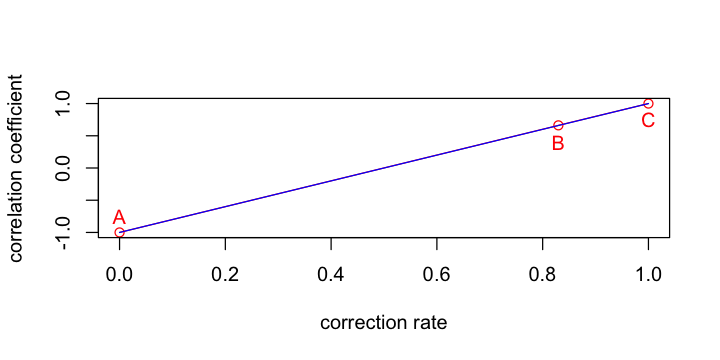

In [13]:
# Plot the relationship of correlation and corretion
P<-c(0,num/length(LR_tradeSigns),1)
rho<-c(-1,corrTS,1)
options(repr.plot.height=3, repr.plot.width=6)
plot(P,rho,type='o',col='red',xlab='correction rate',ylab='correlation coefficient')
# Add y=2x-1 line
curve(2*x-1,from=0, to=1,add = TRUE,col='blue')
text(0,-0.75,"A",col='red')
text(0.83,0.4,"B",col='red')
text(1,0.75,"C",col='red')

Figure 1. Relationship of correction rate and correlation coefficients with indicator line $y=2x-1$

## Realized spread by exchange

### 3. (8 points)

(a) Reproduce Figure 6 from the lecture slides, making sure to get the aesthetics right.

(b) Explain why the realized spread profile varies by exchange.

(c) Redo the picture adjusting for the following (assumed) take fees:

** Exchange ** | ** Take fee ** 
--- | --- 
| (**cents**)
D | 0.10 
B | -0.04
Z | 0.29
Y | 0.00
P | 0.25

(d) Based on your results, where would you advise sending a small market order?  How about a large one?


### Answer of Q3
#### (a) Reproduce Figure 6 from the lecture slides

In [14]:
#download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tqBAC_20130731.zip", destfile="tqBAC_20130731.zip")
#unzip(zipfile="tqBAC_20130731.zip")
#load("tqBAC_20130731.rData")
#tqdata <- NULL
#for(i in 1:8){tqdata <- xts(rbind(tqdata,tqBAC[[i]]))}
#data.frame(head(tqdata))

In [15]:
# Load the data
#load('tq.rData')  # Already loaded
#tqdata <- tqBAC
data.frame(head(tqdata))

,SYMBOL,EX,PRICE,SIZE,COND,BID,BIDSIZ,OFR,OFRSIZ
2012-05-04 09:30:00,BAC,T,7.89,38538,F,7.89,523,7.9,952
2012-05-04 09:30:01,BAC,Z,7.885,288,@,7.88,61033,7.9,92866
2012-05-04 09:30:03,BAC,X,7.89,1000,@,7.88,1974,7.89,333
2012-05-04 09:30:07,BAC,T,7.89,19052,F,7.88,1058,7.89,218
2012-05-04 09:30:08,BAC,Y,7.89,85053,F,7.88,108101,7.9,31104
2012-05-04 09:30:09,BAC,D,7.8901,10219,@,7.89,268,7.9,291


Table 2. Overview of tqBAC

In [16]:
# Realized half-spread
p<- as.numeric(tqdata$PRICE)
n <- length(p)
mids <- (as.numeric(tqdata$OFR) + as.numeric(tqdata$BID))/2
rs <- function(lag){mean(tradeSigns[1:(n-lag)]*(p[1:(n-lag)]-mids[-(1:lag)]))}
(rs(500))

[1] 0.001464515

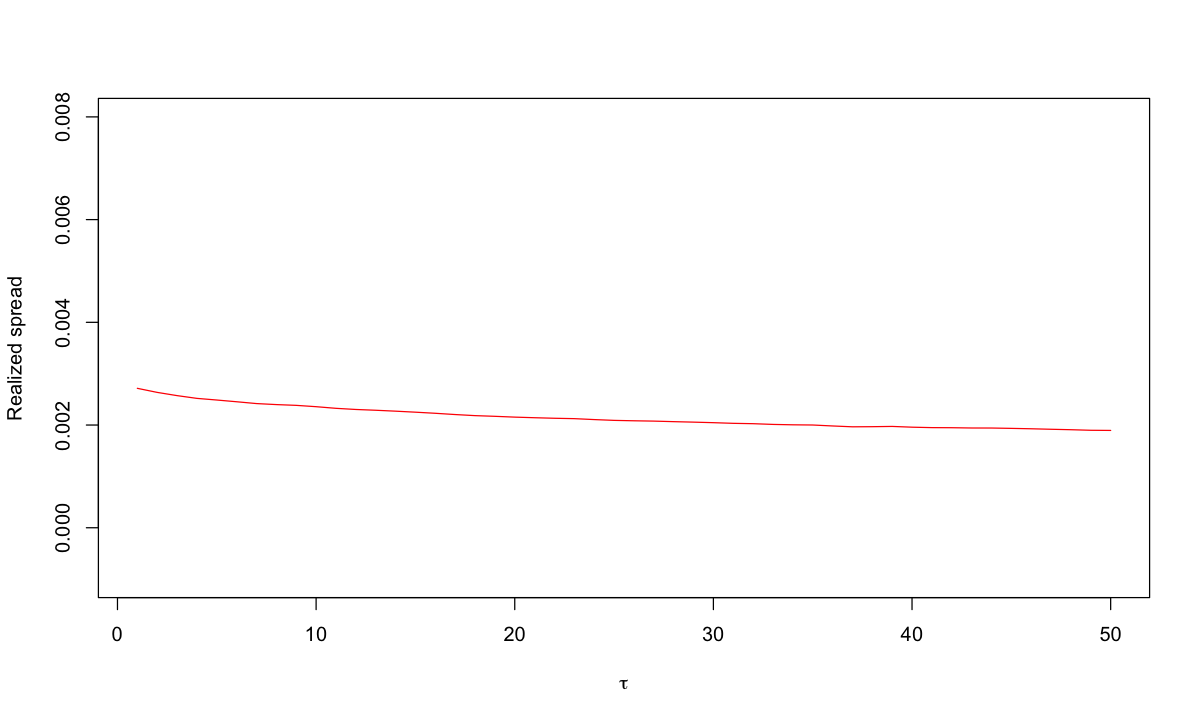

In [17]:
options(repr.plot.height=6, repr.plot.width=10)
rsLag <- sapply(1:50,rs)
plot(1:50,rsLag,col="red",type="l",xlab=expression(tau), ylab = "Realized spread",ylim = c(-0.001,0.008))

In [18]:
# Use subset function to slice the data into 5 different exchanges + 1 others
tq_D<- subset(tqdata, as.character(EX)=='D')
tq_B<- subset(tqdata, as.character(EX)=='B')
tq_Z<- subset(tqdata, as.character(EX)=='Z')
tq_Y<- subset(tqdata, as.character(EX)=='Y')
tq_P<- subset(tqdata, as.character(EX)=='P')

In [19]:
# Get the mid price from updated corresponding tqdata
mid_D<- (as.numeric(tq_D$BID)+as.numeric(tq_D$OFR))/2
mid_B<- (as.numeric(tq_B$BID)+as.numeric(tq_B$OFR))/2
mid_Z<- (as.numeric(tq_Z$BID)+as.numeric(tq_Z$OFR))/2
mid_Y<- (as.numeric(tq_Y$BID)+as.numeric(tq_Y$OFR))/2
mid_P<- (as.numeric(tq_P$BID)+as.numeric(tq_P$OFR))/2

In [20]:
# Get the price from updated corresponding tqdata
p_D<- as.numeric(tq_D$PRICE)
p_B<- as.numeric(tq_B$PRICE)
p_Z<- as.numeric(tq_Z$PRICE)
p_Y<- as.numeric(tq_Y$PRICE)
p_P<- as.numeric(tq_P$PRICE)

In [21]:
# Get the trade signs by using getTradeDirection() function
TS_D<-getTradeDirection(tq_D)
TS_B<-getTradeDirection(tq_B)
TS_Z<-getTradeDirection(tq_Z)
TS_Y<-getTradeDirection(tq_Y)
TS_P<-getTradeDirection(tq_P)

In [22]:
# Get the trade signs by using defined getLRtradeSigns
TS_D2<- getLRtradeSigns(p_D)
TS_B2<- getLRtradeSigns(p_B)
TS_Z2<- getLRtradeSigns(p_Z)
TS_Y2<- getLRtradeSigns(p_Y)
TS_P2<- getLRtradeSigns(p_P)


In [23]:
# Define Realized half-spread functions for 5 different exchanges

# exchange D
n_D <- length(p_D)
rs_D <- function(lag){mean(TS_D[1:(n_D-lag)]*(p_D[1:(n_D-lag)]-mid_D[-(1:lag)]))}

# exchange B
n_B <- length(p_B)
rs_B <- function(lag){mean(TS_B[1:(n_B-lag)]*(p_B[1:(n_B-lag)]-mid_B[-(1:lag)]))}

# exchange Z
n_Z <- length(p_Z)
rs_Z <- function(lag){mean(TS_Z[1:(n_Z-lag)]*(p_Z[1:(n_Z-lag)]-mid_Z[-(1:lag)]))}

# exchange Y
n_Y <- length(p_Y)
rs_Y <- function(lag){mean(TS_Y[1:(n_Y-lag)]*(p_Y[1:(n_Y-lag)]-mid_Y[-(1:lag)]))}

# exchange P
n_P <- length(p_P)
rs_P <- function(lag){mean(TS_P[1:(n_P-lag)]*(p_P[1:(n_P-lag)]-mid_P[-(1:lag)]))}

In [24]:
# Get the BAC realized half-spread on 5 exchanges with maxlags=50
rsLag_D <- sapply(1:50,rs_D)
rsLag_B <- sapply(1:50,rs_B)
rsLag_Z <- sapply(1:50,rs_Z)
rsLag_Y <- sapply(1:50,rs_Y)
rsLag_P <- sapply(1:50,rs_P)

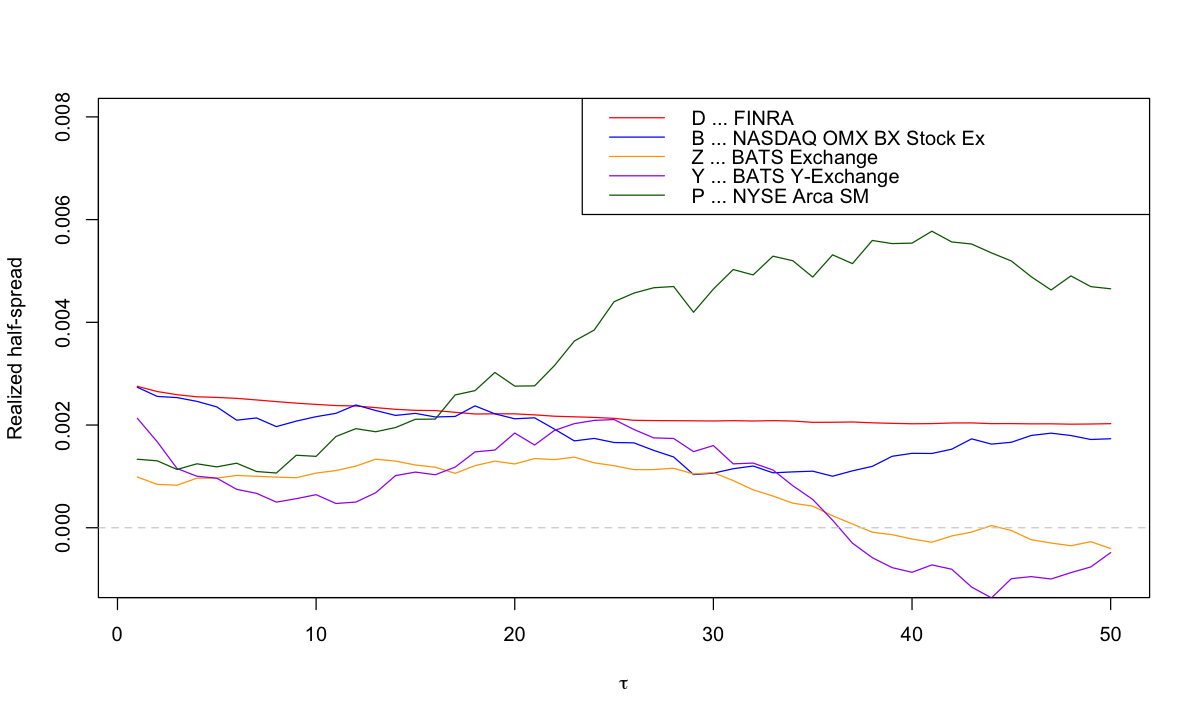

In [25]:
options(repr.plot.height=6, repr.plot.width=10)
plot(1:50,rsLag_D,col="red",type="l",xlab=expression(tau), 
     ylab = "Realized half-spread",ylim = c(-0.001,0.008))
lines(1:50,rsLag_B,type='l',col='blue')
lines(1:50,rsLag_Z,type='l',col='orange')
lines(1:50,rsLag_Y,type='l',col='purple')
lines(1:50,rsLag_P,type='l',col='dark green')
abline(h = 0,col = "lightgray",lty=2)
legend('topright',
      c("D ... FINRA","B ... NASDAQ OMX BX Stock Ex","Z ... BATS Exchange",
        "Y ... BATS Y-Exchange","P ... NYSE Arca SM"),
       lty=c(1,1,1,1,1),col=c("red","blue","orange","purple","dark green"))

Figure 1. Reproduce Figure 6 in the lecture notes: *"Different exchanges have different realized spread profiles depending on fee structure"*
* Note: The y-axis is **effective half-spread** by using the formula: 

$$\frac{1}{2}s^R=\langle  \epsilon_t\,(p_t-m_{t+\tau})  \rangle$$  
    
   for some $\tau >0$.

#### (b) Explain why the realized spread profile varies by exchange

* The reason of variation of realized spread by exchanges is the variation of fees in different exchanges. 

* In particular,

    * From Figure 6 in lecture 4, we can see that the realized spreads of Z and P are much smaller than spreads of others.

    * From given take fee table of 5 exchanges, we can see the common feature of Z and P is higher take fee than others.

    * From lecture 1, we know that BZX gives rebates to limit order submitters, but BYX gives rebates to markert order submitters.
    
    * Therefore, we could conclude that the higher the take fees of exchange, the smaller realized spread.

#### (c) Redo the picture adjusting for the given fees

* Since (a) measured the realized half-spread by using the formula:     

    $$\frac{1}{2}s^R=\langle  \epsilon_t\,(p_t-m_{t+\tau})  \rangle$$ 

    for some
    $\tau >0$ . **Note: no 2 here compare to the formula in Lecture 4, since this measure realized half-spread**
    
    Therefore, the adjusting formula with take fee is:
    
    $$\frac{1}{2}s^R=\langle  \epsilon_t\,(p_t-m_{t+\tau})  \rangle +f$$ 
    
    for some
    $\tau >0$ and $f$ denotes the take fee of exchanges

In [26]:
# Take fees of 5 exchanges
f<-c(0.001,-0.0004,0.0029,0,0.0025)

In [27]:
# Get the BAC adjusting realized half-spread on 5 exchanges with maxlags=50
rsLag_DA <- rsLag_D+f[1]
rsLag_BA <- rsLag_B+f[2]
rsLag_ZA <- rsLag_Z+f[3]
rsLag_YA <- rsLag_Y+f[4]
rsLag_PA <- rsLag_P+f[5]

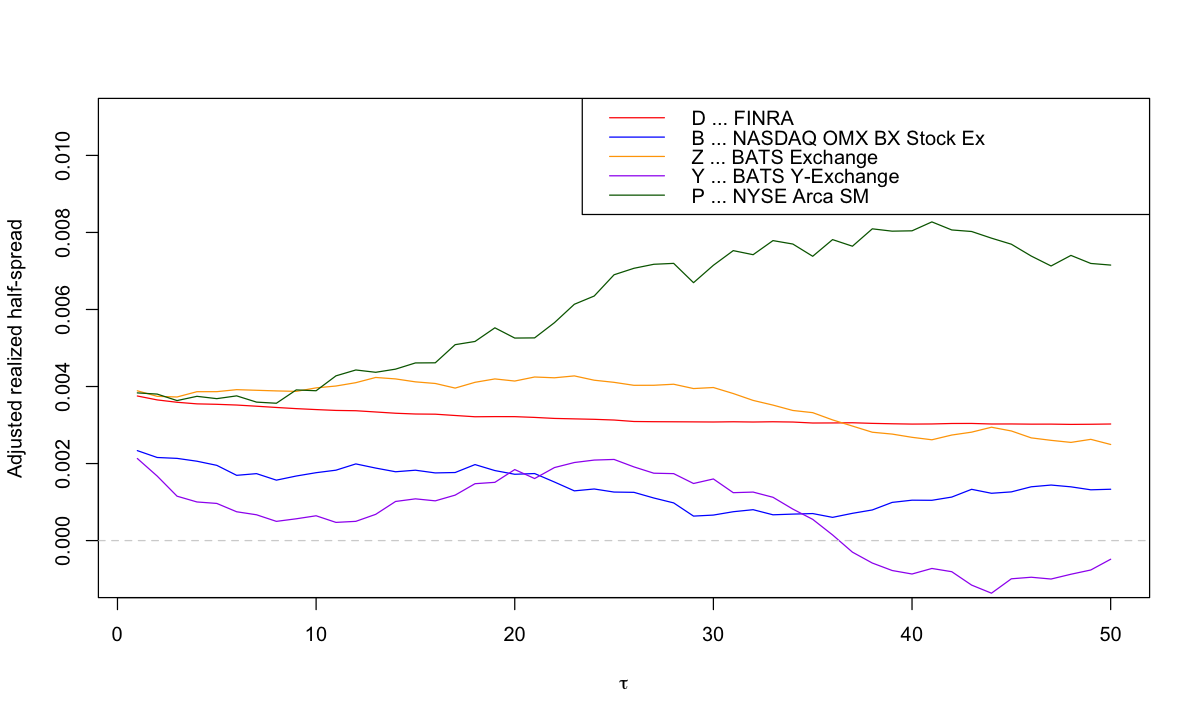

In [28]:
options(repr.plot.height=6, repr.plot.width=10)
plot(1:50,rsLag_DA,col="red",type="l",xlab=expression(tau), ylab = "Adjusted realized half-spread",ylim = c(-0.001,0.011))
lines(1:50,rsLag_BA,type='l',col='blue')
lines(1:50,rsLag_ZA,type='l',col='orange')
lines(1:50,rsLag_YA,type='l',col='purple')
lines(1:50,rsLag_PA,type='l',col='dark green')
abline(h = 0,col = "lightgray",lty=2)
legend('topright',
      c("D ... FINRA","B ... NASDAQ OMX BX Stock Ex","Z ... BATS Exchange",
        "Y ... BATS Y-Exchange","P ... NYSE Arca SM"),
       lty=c(1,1,1,1,1),col=c("red","blue","orange","purple","dark green"))

#### (d) Advise of sending a small market order, or a large market order

* For small market order, the liquidity and the time to be executed is not a problem needs to be concerned. Therefore, we should choose an exchange with low fee. From the given table, Exchange B (with take fee -0.04 cents)might be a good exchange to send small market order.
<br><br>

* But for large market order, we should first consider the liquidity and time to be exectued instead of the taking fees. From lecture notes 1, we know that BYX gives rebates to market order, and the market orders are bigger than BZX. And then it would be better if dealer could find an exchange with low take fee meet previous conditions. Therefore, it might be a good choice to send large market order to Exchange Y (with no take fee: 0 cent)

## Predicting trade signs

### 4. (6 points) 

The following require the *tradeSigns* series from Problem 2.

(a) Denote the probability of a sign reversal by $\pi$.  Derive an expression in terms of $\pi$ for the conditional expectation $\E[\epsilon_t|\epsilon_{t-1}]$.

(b) Assume zero expectation of the trading signs, fit an AR(1) model to the series *tradeSigns*.  What is the coefficient returned by this model?  Explain how  this coefficient relates to $\pi$?


### Answers of Q4
#### (a) Compute the conditional expectation

$\epsilon_{t-1}$|$\epsilon_t$|Probability
--|--|--
1|-1|$\pi$
1|1|$1-\pi$
-1|1|$\pi$
-1|-1|$1-\pi$

Since $\epsilon$ can only be 1 or -1 with probability $\frac{1}{2}$, therefore the conditional probability is:

$$
\mathbb{E}[\epsilon_t|\epsilon_{t-1}]=\epsilon_{t-1} \frac{1}{2} \times 1 (-1\times \pi + 1\times (1-\pi))+\epsilon_{t-1} \frac{1}{2} \times (-1) (1\times \pi - 1\times (1-\pi))\\
=\epsilon_{t-1}(1-2\pi)
$$

#### (b) Fit AR(1) of tradeSigns, get the coefficient, and explian the relationship of the coefficient to $\pi$

In [29]:
# Get the tradeSigns
tradeSigns<- getTradeDirection(tqdata)

In [30]:
# Fit AR(1)
X_t<- tradeSigns[2:length(tradeSigns)]       # X_t
X_t_1<- tradeSigns[1:(length(tradeSigns)-1)] # X_{t-1}
# Combine the time series to a dataframe
df_AR1<- data.frame(X_t,X_t_1)  # Column names: X_t, X_t_1

In [31]:
# Get the coefficients through linear regression without constant term,
# since conditional expection of epsilon_t given epsilon_{t-1} only has previous information,
# no constant term
fit_AR1<- lm(X_t~0+X_t_1, data = df_AR1)
cat("The coefficient of linear regression without constant term is:",fit_AR1$coefficients,"\n")

# If regress with constant term
fit2_AR1<- lm(X_t~X_t_1, data = df_AR1)
cat("The coefficients (intercept and coefficient of X_{t-1}) of linear regression with constant term are :",fit2_AR1$coefficients)

The coefficient of linear regression without constant term is: 0.08472868 
The coefficients (intercept and coefficient of X_{t-1}) of linear regression with constant term are : 0.05416048 0.08153492

* The AR(1) model used for tradeSigns is:

$$
\epsilon_t=\alpha +\beta \epsilon_{t-1}+\omega_t
$$

where $\omega_t \sim N(0,\sigma^2)$

* Therefore,
    * if we consider $\alpha != 0$, we have:
    
    $$
    \mathbb{E}[\epsilon_t|\epsilon_{t-1}]=\beta \epsilon_{t-1} +\alpha=(1-2\pi)\epsilon_{t-1}
    $$
    
    $\Rightarrow$
    
    $$
    1-2\pi \approx \beta = 0.08472868
    $$
    
    * If we consider $\alpha =0$, we have:

    $$
    \mathbb{E}[\epsilon_t|\epsilon_{t-1}]=\beta \epsilon_{t-1} =(1-2\pi)\epsilon_{t-1}
    $$
    
    $\Rightarrow$
    
    $$
    1-2\pi =\beta = 0.08153492
    $$


## The MRR model

### 5. (6 points)
Using the estimate of $\rho$ (the coefficient obtained from fitting to an AR(1) model) from Problem 4 and equation (11) from the lecture slides:

$$
\Delta p_t=(\phi+\lambda)\,\epsilon_t-(\phi+\rho\,\lambda)\,\epsilon_{t-1}+e_t+\Delta \xi_t
$$

estimate by linear regression the MRR parameters $\phi$ (transaction cost) and $\lambda$ (adverse selection or "Kyle lambda") from  *tqBAC*.  This amounts to ignoring the autocorrelation of the $\Delta \xi_t$.
<br>

Hint: Use the R function *lm*  to perform the linear regressions.

### Answer of Q5

In [32]:
# Retrive the data from Q4
epl_t<- X_t      # tradeSigns[2:length(tradeSigns)]
epl_t_1<- X_t_1  # tradeSigns[1:l(ength(tradeSigns)-1)]
# Get the time series of difference of price
price<- as.numeric(tqdata$PRICE)
diff_p<- price[2:length(price)]-price[1:(length(price)-1)]

# Combine data
df1<- data.frame(epl_t,epl_t_1)
df2<- data.frame(diff_p,epl_t,epl_t_1)

In [33]:
# Get the coefficients
# Both linear regression has constant term
fit1<-lm(epl_t~epl_t_1,data=df1)
fit2<-lm(diff_p~epl_t+epl_t_1,data=df2)
rho<- fit1$coefficients[1]
cof1<-fit2$coefficients[2]
cof2<-fit2$coefficients[3]
cat("The coefficient rho from tradeSigns is: ",rho,'\n')
cat("The coefficients of current linear regression are: ",cof1,cof2)

The coefficient rho from tradeSigns is:  0.05416048 
The coefficients of current linear regression are:  0.002876938 -0.002336749

Therefore, we have:

$$
\phi+\lambda=cof1\\
\phi+\rho\lambda=-cof2\\
$$

$\Rightarrow$

$$
\lambda=\frac{cof1+cof2}{1-\rho}\\
\phi=cof1-\lambda
$$


In [34]:
cat("The transaction cost of MMR model is: ",(cof1+cof2)/(1-rho),"\n")
cat("The Kyle lambda of MMR model is: ",(cof1-(cof1+cof2)/(1-rho)))

The transaction cost of MMR model is:  0.000571122 
The Kyle lambda of MMR model is:  0.002305816

In [35]:
# End recording the running time
print('The running time of this notebooks is: ')
proc.time()-ptm

[1] "The running time of this notebooks is: "


   user  system elapsed 
  5.464   0.476   6.637 